# Exercise Sheet 8

## Exercise 1

Run regression using the k-nearest neighbors approach on the dataset R. You find the corresponding training and test data set under dataset_R_train.npy and dataset_R_test.npy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def load_data(name, m=None):
    data = np.load(name)
    x = data[:,:-1]
    y = data[:,-1]

    return (x, y)

def plot_numbers(numb, tag, rng=None):
    if rng is None:
        rng = np.random.default_rng(seed=66)
    ones = [ numb[tag == i][0] for i in range(5) ]
    twos = [ numb[tag == (i+5)][0] for i in range(5) ]
    (fig, axs) = plt.subplots(nrows=2, ncols=5)
    for (ax,i) in zip(axs[0], range(5)):
        ax.imshow(ones[i].reshape(8,8), cmap='gray', vmin=0, vmax=16)
    for (ax,i) in zip(axs[1], range(5)):
        ax.imshow(twos[i].reshape(8,8), cmap='gray', vmin=0, vmax=16)
    plt.show()


In [10]:
# Load data
x_train, y_train = load_data('dataset_R_train.npy')
x_test, y_test = load_data('dataset_R_test.npy')

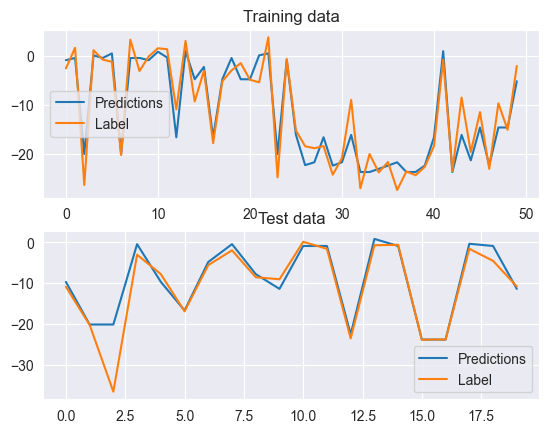

In [21]:
from sklearn.neighbors import KNeighborsRegressor
k = 5 # Number of neighbors
knn_reg = KNeighborsRegressor(n_neighbors=k, weights="uniform")
knn_reg.fit(x_train, y_train) # store the training data

# show performance
fig, (train_ax, test_ax) = plt.subplots(2)
train_ax.set_title("Training data")
train_ax.plot(knn_reg.predict(x_train), label="Predictions") # calculate the mean of of the k nearest neighbours for all training samples
train_ax.plot(y_train, label="Label")
train_ax.legend()

test_ax.set_title("Test data")
test_ax.plot(knn_reg.predict(x_test), label="Predictions") # calculate the mean of of the k nearest neighbours for all validation samples
test_ax.plot(y_test, label="Label")
test_ax.legend()

plt.show()

## Exercise 2

Run the $k$-nearest neighbors algorithm to classify the datasets $\mathrm{E}, \mathrm{G}$, and $\mathrm{O}$. You find the corresponding training and test data set under dataset_E, dataset_G, and dataset_0 with the corresponding ending _train.npy and _test.npy.

Dataset E:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        50
         1.0       0.92      0.94      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Dataset G:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        50
         1.0       0.92      0.88      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Dataset O:
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80        25
         1.0       0.77      0.92      0.84        25

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.

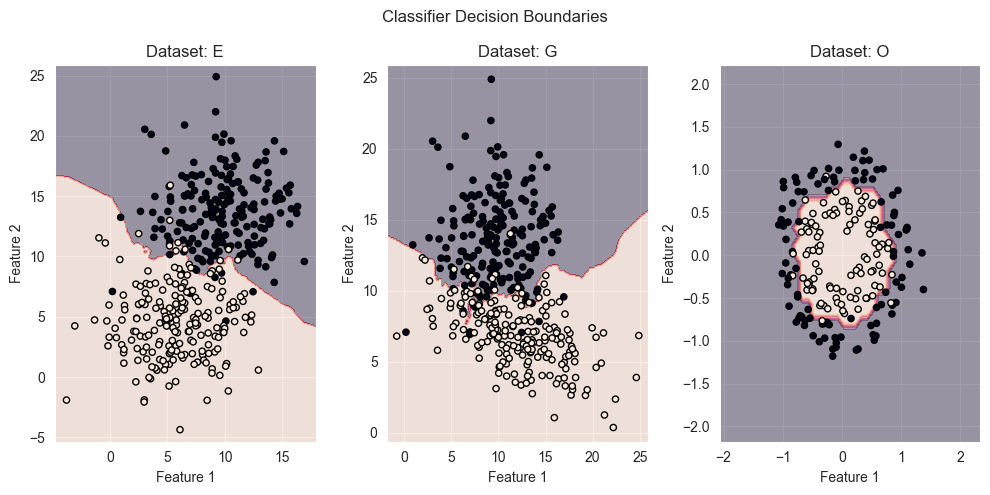

In [41]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

def train_and_predict(model_class, dataset_names: list[str] = ['E', 'G', 'O'], **kwargs):
    fig, axes = plt.subplots(ncols=len(dataset_names))
    fig.set_size_inches(10,5)
    for dataset_name, ax in zip(dataset_names, axes):
        x_train, y_train = load_data(f'dataset_{dataset_name}_train.npy')
        x_test, y_test = load_data(f'dataset_{dataset_name}_test.npy')
        model = model_class(**kwargs)  # Initialize the K-nearest neighbors classifier

        model.fit(x_train, y_train)  # Fit the model on the training data
        predictions = model.predict(x_test)  # Make predictions on the test data

        print("="*50)
        print(f"Dataset {dataset_name}:")
        # Calculate precision, recall, and F1 score
        report = classification_report(y_test, predictions)
        print(report)

        # Step 1: Generate a meshgrid
        x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
        y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        # Step 2: Predict the class labels for each point on the meshgrid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Step 3: Plot the decision boundaries
        ax.contourf(xx, yy, Z, alpha=0.4)
        ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=20, edgecolor='k')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title(f"Dataset: {dataset_name}")
    fig.suptitle('Classifier Decision Boundaries')
    fig.tight_layout()
    plt.show()

train_and_predict(KNeighborsClassifier, n_neighbors=5)

## Exercise 3

Run  the  same  classification  tasks  as  in  Exercise  2  but  now  using  linear  discriminant  analysis(LDA).

Dataset E:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        50
         1.0       0.96      0.92      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Dataset G:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        50
         1.0       0.87      0.90      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

Dataset O:
              precision    recall  f1-score   support

         0.0       0.46      0.44      0.45        25
         1.0       0.46      0.48      0.47        25

    accuracy                           0.46        50
   macro avg       0.46      0.46      0.46        50
weighted avg       0.46      0.46      0.

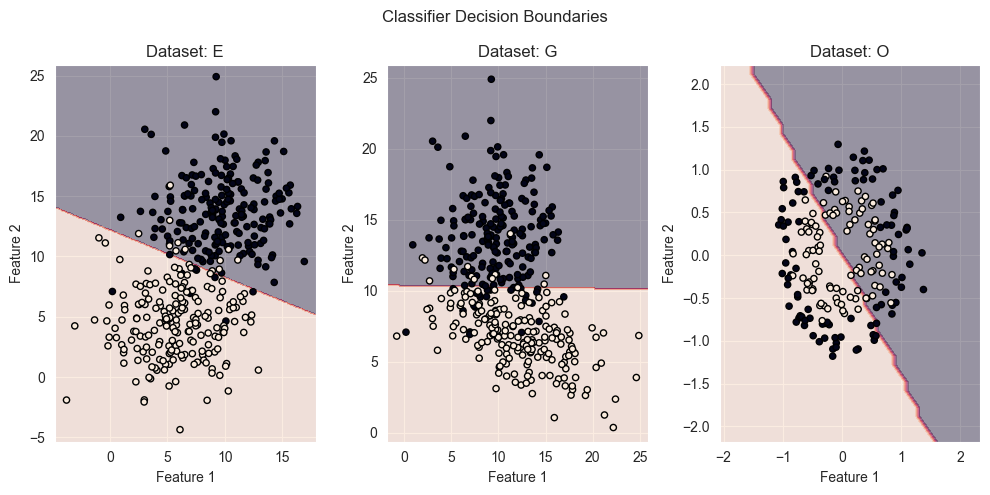

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()  # Initialize the Linear Discriminant Analysis model
train_and_predict(LinearDiscriminantAnalysis)

## Exercise 3
Run the same classification tasks as in Exercise 2 but now using quadratic discriminant analysis(QDA).

Dataset E:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        50
         1.0       0.96      0.92      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Dataset G:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        50
         1.0       0.92      0.90      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Dataset O:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83        25
         1.0       0.81      0.88      0.85        25

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.

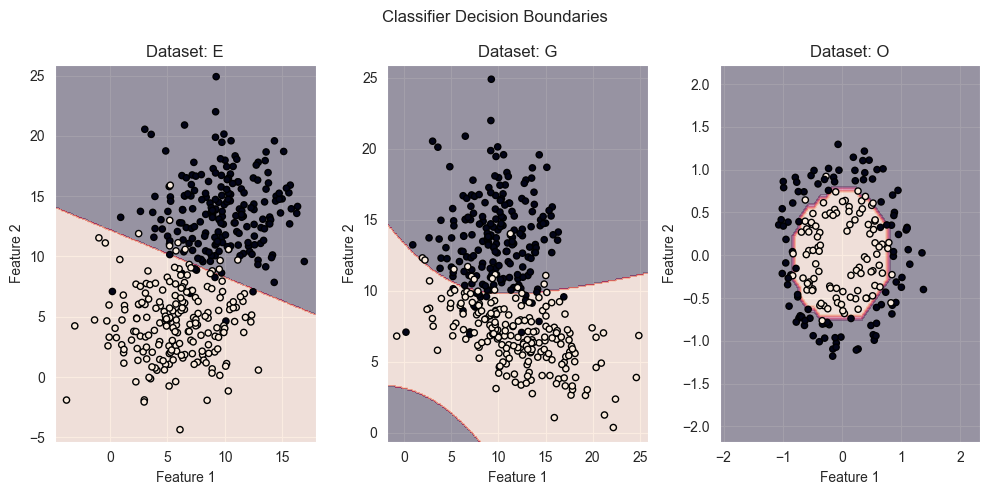

In [44]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_and_predict(QuadraticDiscriminantAnalysis)

## Exercise 5
Solve the classification task on the digits dataset (load_digits() and train_test_split()).Use the following methods and report their train and test scores for each method:k-nearest neigh-bors classifier, LDA, and QDA.

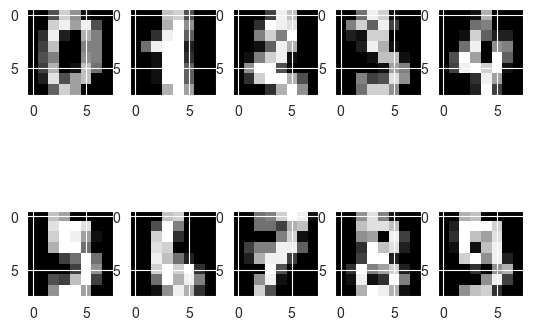

In [36]:
X, y = load_digits(return_X_y=True)
plot_numbers(X, y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=66)

In [53]:
models = [KNeighborsClassifier(5), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
for model in models:
    model.fit(x_train, y_train)  # Fit the model on the training data
    predictions = model.predict(x_test)  # Make predictions on the test data

    print("="*50)
    print(f"Model: {model}:")
    # Calculate precision, recall, and F1 score
    report = classification_report(y_test, predictions)
    print(report)

Model: KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        37
           3       0.97      0.97      0.97        33
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        33
           7       0.97      1.00      0.98        28
           8       1.00      0.96      0.98        24
           9       1.00      0.97      0.99        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Model: LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.95      0.86      0.90        42
          

C:\Users\mhuep\.conda\envs\machine_learning\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
